In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime

import warnings
warnings.filterwarnings('ignore')


In [12]:
df = pd.read_csv('TCS_stock_history.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [10]:
missing_values = df.isnull().sum()
print('Missing values in the dataset', missing_values)

Missing values in the dataset Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [13]:
df.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object

In [15]:
df.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,2012-08-23 19:22:31.109119488,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
min,2002-08-12 00:00:00,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,2008-02-14 12:00:00,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,2012-09-04 00:00:00,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,2017-03-22 12:00:00,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000
std,NaN,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842


In [24]:
correlation_with_close = df.corr()['Close'].sort_values(ascending=False)
print(correlation_with_close)

Close           1.000000
High            0.999910
Low             0.999896
Open            0.999776
Prev_Close      0.999729
MA50            0.996858
MA200           0.989252
Date            0.906053
Year            0.904005
Dividends       0.058102
Day_of_Week     0.000202
Day             0.000146
Stock Splits   -0.008033
Month          -0.009692
Volume         -0.198311
Name: Close, dtype: float64


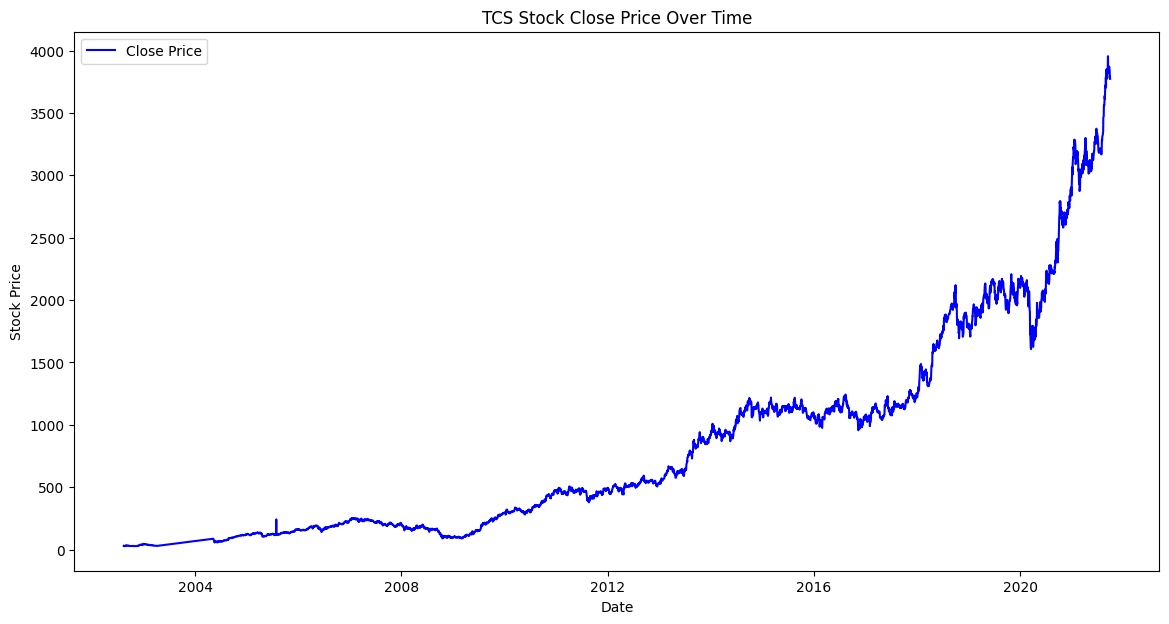

In [16]:
# Exploratory Data Analysis

#Plotting Close price over Time

plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Close'], color='blue', label='Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Close Price Over Time')
plt.legend()
plt.show()


In [17]:
# Calculatine 50-day and 200-day moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

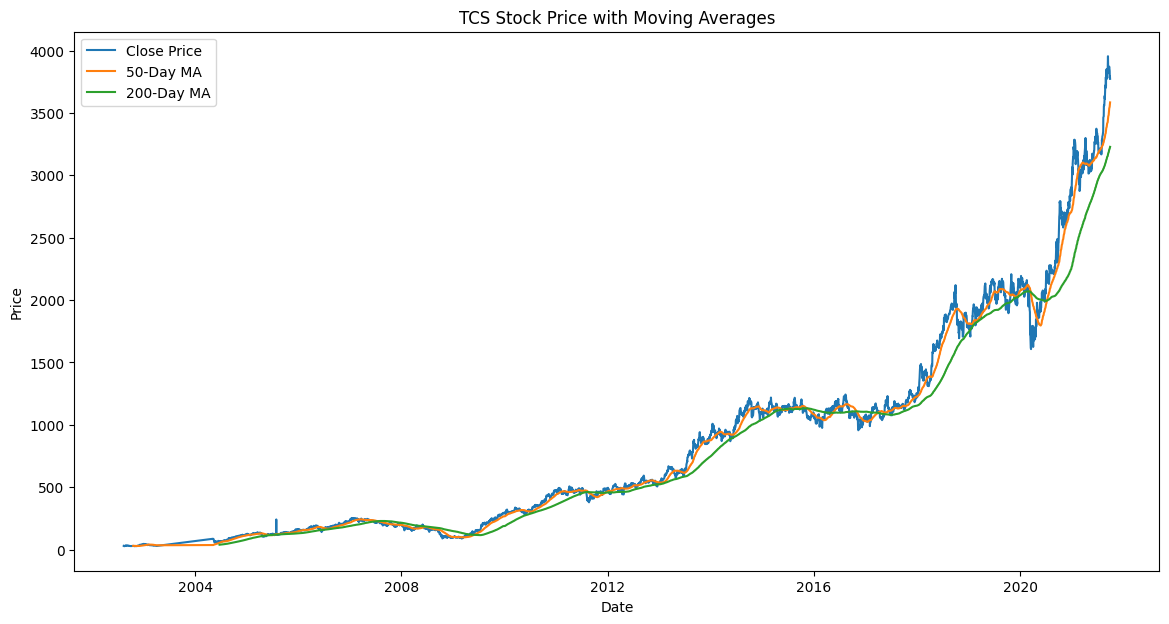

In [18]:
#Plot with Moving Average
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA50'], label='50-Day MA')
plt.plot(df['Date'], df['MA200'], label='200-Day MA')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS Stock Price with Moving Averages')
plt.legend()
plt.show()

In [19]:
# Feature Engineering

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek

#Lag Features
df['Prev_Close'] = df['Close'].shift(1)
df.dropna(inplace=True) # Drop rows with NaN values from shifting

In [21]:
# Model building and Prediction

# Feature Selection

X = df[['Open', 'High', 'Low', 'Volume', 'Prev_Close', 'Day_of_Week', 'Month']]

y=df['Close']

#Split into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

#Predictions 

y_pred = model.predict(X_test)

#Evaluation

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-Squared Error:", r2_score(y_test, y_pred))

Mean Squared Error: 39.04992998516231
R-Squared Error: 0.9999438356582193


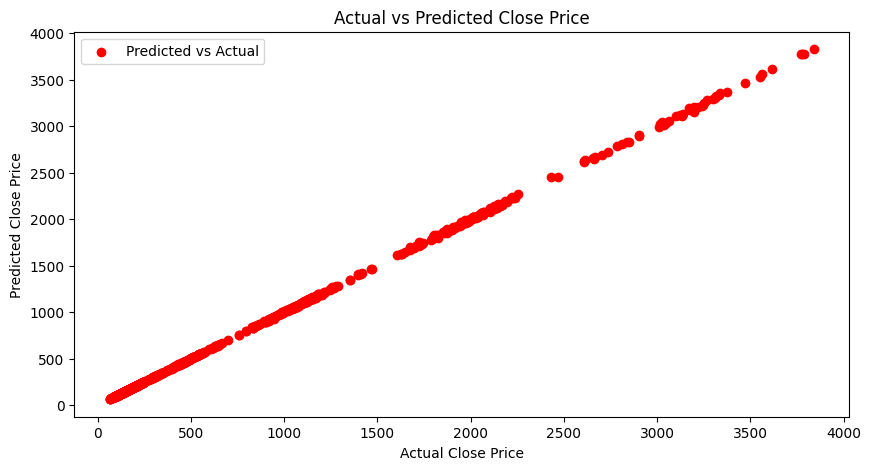

In [22]:
#Visualize Model Performance

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='red', label='Predicted vs Actual')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [23]:
# Save the Model

import pickle
with open('TCS_Stock_Predictor.pkl', 'wb') as file:
    pickle.dump(model, file)

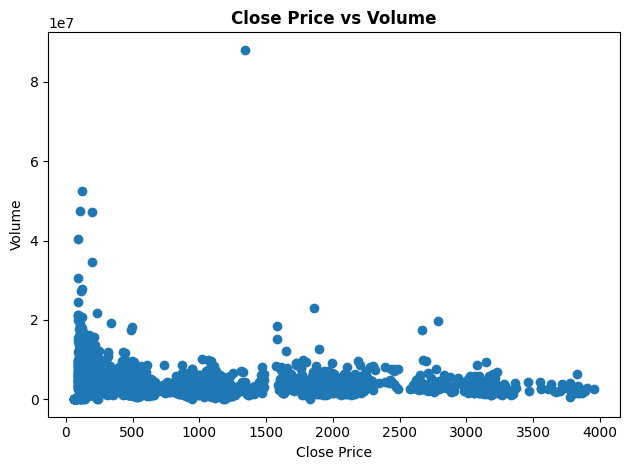

In [28]:
# Close Price vs Volume

plt.scatter(df['Close'], df['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs Volume', weight="bold")
plt.tight_layout()
plt.show()

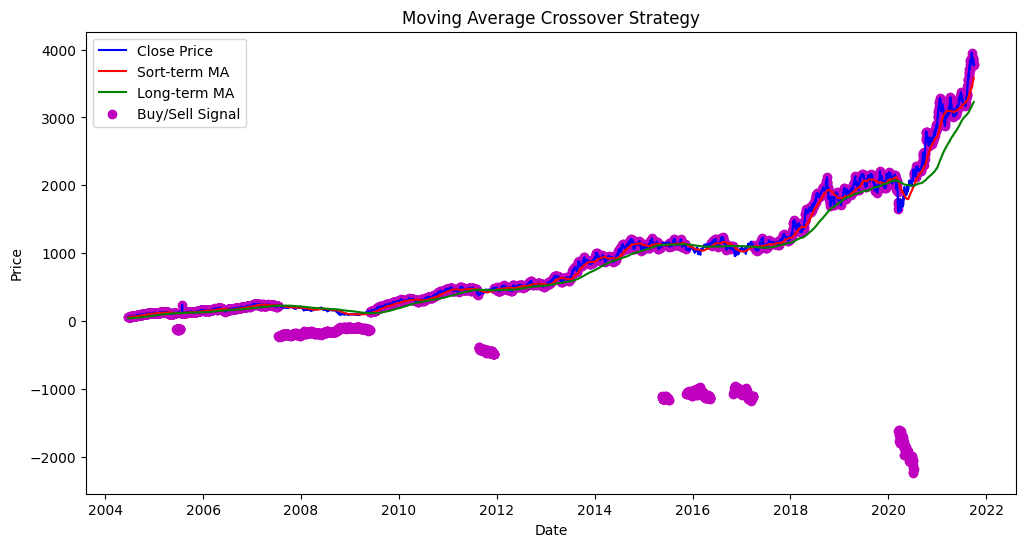

In [33]:
# Creating a trading signal based on Moving Averages crossovers

df['Signal'] = np.where(df['MA50'] > df['MA200'], 1, -1)

#Plot the strategy Signals

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='b')
plt.plot(df['Date'], df['MA50'], label = 'Sort-term MA', color='r')
plt.plot(df['Date'], df['MA200'], label='Long-term MA', color='g')

plt.scatter(df['Date'], df['Close'] * df['Signal'], label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()